<a href="https://colab.research.google.com/github/Jinukki/KJU/blob/master/15108329_Lorenz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## solve_ivp 를 이용한 Lorenz 함수 표현

### Lorenz equations is the following system of three coupled nonlinear ODEs,

$$
\begin{align*}
x'(t) &= \sigma(y - x)\\ 
y'(t) &= x(\rho - z) - y \\ 
z'(t) &= x y - \beta z
\end{align*}
$$

###  The ODE solver in scipy is the scipy.integrate.solve_ivp function. 
 * Steps to solve an ODE with solve_ivp:
       dy/dt = f(t, y)
       y(0) = y_0
    (1) Import solve_ivp from the scipy.integrate module<br>
    (2) Define the function, f, for the right-hand side of the ODE<br>
        - Make sure ODE is in standard form
        - function arguments: f(t, y, [parameters])
    (3) Create an array of the initial and final time: t_span = [t_beg, t_end]<br>
        - The solver will choose it's own internal time points!
    (4) Define an array with the value of the initial condition: y_0 = [val]<br>
        - Must be an array!
    (5) Find the solution using solve_ivp<br>
          <(soln)> = solve_ivp(fn name, t_span, y_0)

In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sympy
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [0]:
def f(t, xyz):
    x, y, z = xyz
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

xyz0 = [1.0, 1.0, 1.0]
t_span = np.array([0, 25])

In [0]:
rho, sigma, beta= 28, 8, 8/3
xyz1 = solve_ivp(f, t_span, xyz0, t_eval=np.linspace(0,25,10000))

### t_eval : array_like or None, optional
Times at which to store the computed solution, must be sorted and lie within t_span. If None (default), use points selected by the solver.

In [0]:
sigma= 2*sigma
xyz2 = solve_ivp(f, t_span, xyz0, t_eval=np.linspace(0,25,10000))

In [0]:
sigma=8
rho, beta = 2.5*rho, 0.7*beta
xyz3 = solve_ivp(f, t_span, xyz0, t_eval=np.linspace(0,25,10000))

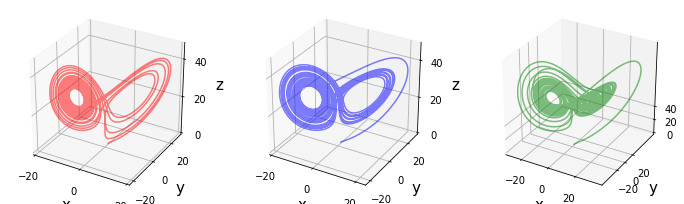

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3.5), subplot_kw={'projection': '3d'})

for ax, xyz, c in [(ax1, xyz1, 'r'), (ax2, xyz2, 'b'), (ax3, xyz3, 'g')]:
    ax.plot(xyz.y[0], xyz.y[1], xyz.y[2], c, alpha=0.5)
    ax.set_xlabel('x', fontsize=15)
    ax.set_ylabel('y', fontsize=15)
    ax.set_zlabel('z', fontsize=15)
    ax.set_xticks([-20, 0, 20])
    ax.set_yticks([-20, 0, 20])
    ax.set_zticks([0, 20, 40])

## If you would like to learn more about Markdown, have a look at __[Scipy Guide.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy-integrate-solve-ivp)__